In [1]:
import numpy as np
input_value = np.array([[0,0], [0, 1], [1, 1], [1, 0]])
output = np.array([0, 1, 1, 1])
output = output.reshape(4, 1)
input_value.shape, output.shape

((4, 2), (4, 1))

In [2]:
def sigmoid_function(x):
        return 1/(1 + np.exp(-x))

def derivative_fun(x):
    return sigmoid_function(x) * (1 - sigmoid_function(x))

In [3]:
weights=np.array([[0.1],[0.1]])
bias=0.5

In [4]:
error_data=[]
for epoch in range(500):
    weighted_sum = np.dot(input_value,weights) +  bias 
    # g(xW + b)
    first_output = sigmoid_function(weighted_sum)# activation function 
    # g'(x) = g(x)(1-g(x))
    #  # y - hj
    error = first_output - output
    first_der = error
    #back propagate
    second_der = derivative_fun(first_output)
    derivative = first_der * second_der
    # loss function update #adjust weights and bias
    t_input = input_value.T
    final_derivative = np.dot(t_input, derivative)
    weights = weights - 0.05 * final_derivative
    for i in derivative:
        bias = bias - 0.05 * i
    total_error = np.square(np.subtract(first_output, output)).mean()
    error_data.append([1, total_error])

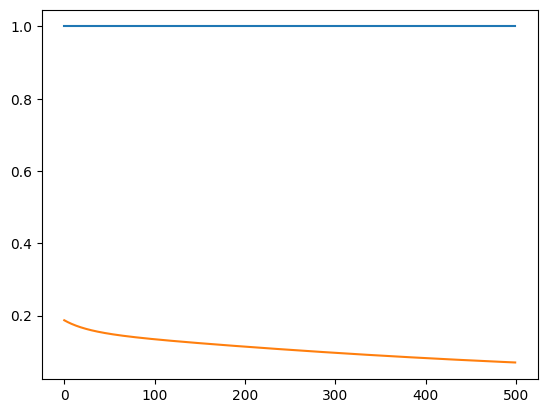

In [7]:
import matplotlib.pyplot as plt
x_axis=[]
y_axis=[]
for i,value in enumerate(error_data):
    x_axis.append(i)
    y_axis.append(value)
plt.plot(x_axis,y_axis)

In [6]:
! pip install matplotlib

     |████████████████████████████████| 9.2 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 56.3 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 8.7 MB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 22.1 MB/s eta 0:00:01


In [8]:
import pickle

model = {
    "weights": weights,
    "bias": bias
}

with open('myfirstnn.pickle', 'wb') as file:
    pickle.dump(model, file)